In [35]:
%run ./solve_ivp_functions.ipynb

Ns = []
PMs = []
for i in range(4):
    m_1 = M_earth
    m_2 = M_sun
    vx_1, vy_1 = rotate(np.array([0.,   29.29e3]), -np.pi*(1+i/7))
    vx_2, vy_2 = np.array([0.,       0.])
    x_1, y_1 = np.array([-152.100e9, 0.])
    x_2, y_2 = np.array([0.,         0.])
    
    

    s = x_1, y_1, x_2, y_2, vx_1, vy_1, vx_2, vy_2
    t_max = int(1e8)
    res = int(1e7)
    dt = t_max/res
    
    t, [pos1, pos2], [vel1, vel2], r, t_max, sol = orbitals(s, m_1, m_2, t_max=t_max, res=res, R_S=R_S, DL=False)
    posCM = []
    for i in range(len(pos1)):
        posCM.append(findrCM(pos1[i], pos2[i], m_1, m_2))
    PMs.append(np.array([pos1, pos2, posCM]))

    t, [pos1, pos2], [vel1, vel2], r, t_max, sol = orbitals(s, m_1, m_2, t_max=t_max, res=res, R_S=R_S, DL=False, N = True)
    posCM = []
    for i in range(len(pos1)):
        posCM.append(findrCM(pos1[i], pos2[i], m_1, m_2))
    Ns.append(np.array([pos1, pos2, posCM]))

# t_max = 1e8/3
# dt = t_max/5e4
#~5 min STABILIZED

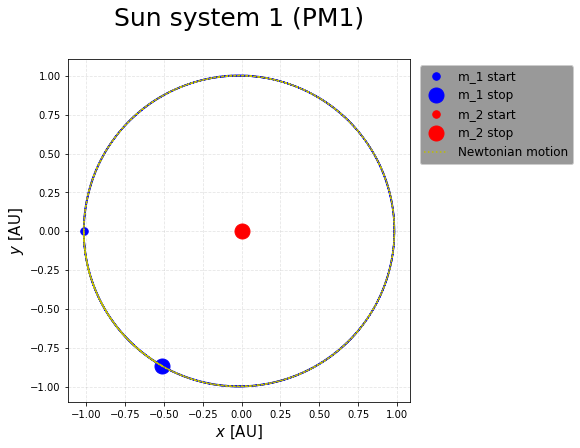

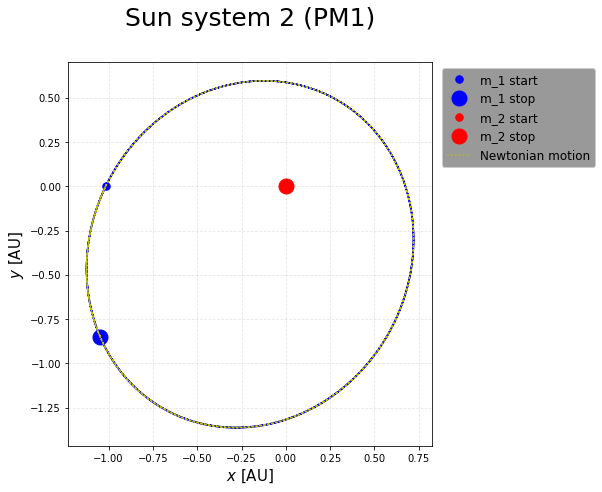

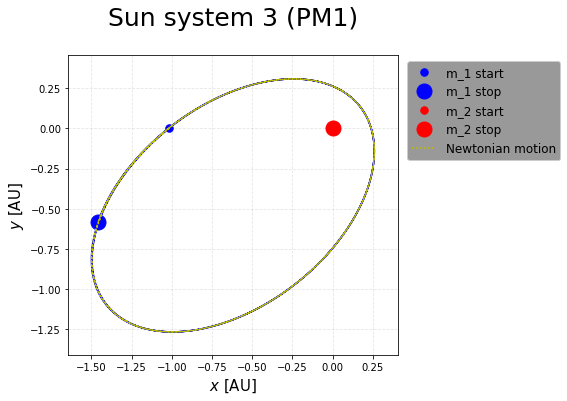

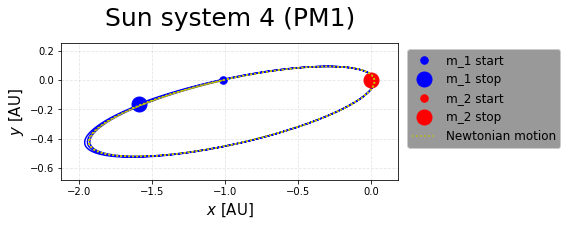

In [36]:
%run ./solve_ivp_functions.ipynb

M = slice(0, -1, 100)
for i in range(4):
    orbPlotter(PMs[i], Ns[i], filename = f'Sun system {1+i} (PM1)')

In [5]:
%run ./solve_ivp_functions.ipynb

# import warnings
# warnings.filterwarnings('error')

m_1 = M_earth
m_2 = M_sun

R_S = findR_S(m_1, m_2, DL=False)

x_1, y_1   = np.array([-152.100e9, 0.])
x_2, y_2   = np.array([0.,         0.])
vx_1, vy_1 = np.array([1e3,        0.])
vx_2, vy_2 = np.array([0.,         0.])

s = x_1, y_1, x_2, y_2, vx_1, vy_1, vx_2, vy_2

t_max = int(1e8)
res = int(1e7)
dt = t_max/res
t, [pos1, pos2, posCM], [vel1, vel2], r, t_max, sol = orbitals(s, m_1, m_2, t_max=t_max, res=res, R_S=R_S, DL=False)


positions = np.array([pos1, pos2, posCM])



C:\Users\Productivity\AppData\Local\Temp\ipykernel_15388\790600114.py:29: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(1 - np.dot(v,v)/c**2)


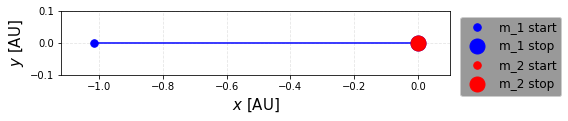

In [6]:
# lim = 1e-4
# lims = (-lim, lim)
lims = 0
orbPlotter(positions, xlim = lims, ylim = lims, DL=False)